In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [22]:
fpath = "../out/atm.nc"
ds = nc.Dataset(fpath)

In [23]:
wlwn = lambda x: 1.0e7/(x-1.0e-20)

In [24]:
def ncdf_spec(ds):

    out = {}

    # bin edges [nm]
    soc_wl_up = ds["bandmax"][:] * 1e9
    soc_wl_lo = ds["bandmin"][:] * 1e9

    # bin edges [cm-1]
    soc_wn_lo = wlwn(soc_wl_up)
    soc_wn_up = wlwn(soc_wl_lo)

    # bin widths [cm-1]
    soc_wn_w = soc_wn_up - soc_wn_lo

    # bin centres [cm-1]
    soc_wn_c = 0.5*(soc_wn_up + soc_wn_lo)

    # get flux
    idx = 0
    soc_fl = np.array(ds["ba_U_LW"][idx,:]) # + ds["ba_U_SW"][idx,:] # W m-2
    soc_fl *= 1e3       # erg s-1 cm-2
    soc_fl /= soc_wn_w  # erg s-1 cm-2 /(cm-1)

    # convert to ascending order of wavenumber
    if soc_wn_c[21] < soc_wn_c[20]:
        soc_fl   = soc_fl[::-1]
        soc_wn_c = soc_wn_c[::-1]
    out["soc_wn"] = soc_wn_c
    out["soc_fl"] = soc_fl


    # RFM data
    out["rfm_wn"] = ds["rfm_wn"][:]
    out["rfm_fl"] = ds["rfm_fl"][:]

    return out

In [25]:
dat = ncdf_spec(ds)

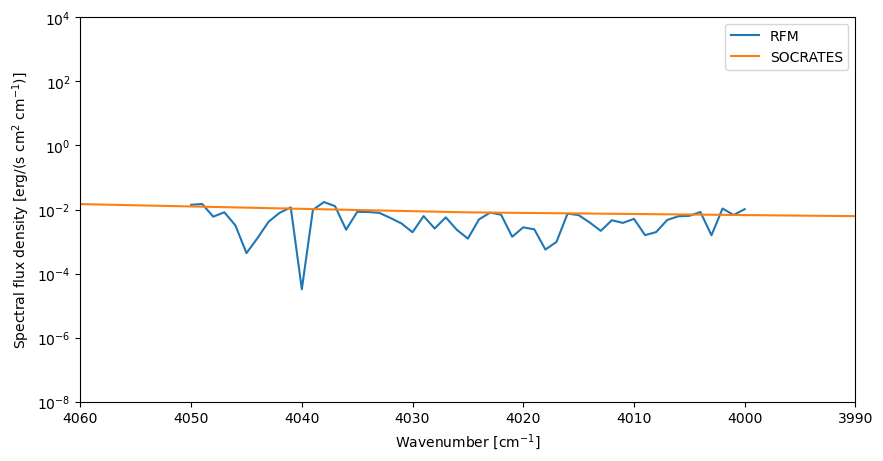

In [37]:
fig,ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(dat["rfm_wn"],dat["rfm_fl"], label="RFM")
ax.autoscale()

ax.plot(dat["soc_wn"],dat["soc_fl"], label="SOCRATES")

ax.legend()

ax.set_xlim(left=np.amax(dat["rfm_wn"])+10, right=np.amin(dat["rfm_wn"])-10)
ax.set_xlabel(r"Wavenumber [cm$^{-1}$]")

ax.set_yscale("log")
ax.set_ylim(bottom=1e-8)
ax.set_ylabel(r"Spectral flux density [erg/(s cm$^2$ cm$^{-1}$)]")

plt.show()